In [26]:
import pandas as pd

In [27]:
df = pd.read_csv("C:/Users/24581/Desktop/南洋理工暑校内容/bankruptcy.csv")

In [28]:
X = df
X = X.drop(columns = "class")
Y = df.loc[:, ["class"]]


In [29]:
from sklearn.feature_selection import SelectKBest, f_regression
f = SelectKBest(score_func=f_regression, k=5)
f = f.fit(X, Y)
f = f.get_support()
f = X.columns[f]


E:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         Attr3    Attr16    Attr26    Attr35    Attr51
0    -0.040269 -0.242796 -0.206675 -0.435600 -1.027090
1     0.304381 -0.603332 -0.591456 -0.986256 -0.079059
2    -0.488404 -0.367159 -0.339401  0.766162  0.393587
3    -0.181684 -0.454498 -0.442992 -0.100314 -0.267896
4     0.678337  0.744187  0.675202  1.004640 -0.210252
...        ...       ...       ...       ...       ...
9995 -0.492082 -0.482695 -0.462706 -0.299502  0.398330
9996  0.184167  0.270885  0.361651 -0.432018 -0.904155
9997 -0.830634 -0.717923 -0.655042 -0.178342  0.549923
9998  0.102420 -0.410858 -0.386039 -0.278292 -0.729872
9999  0.734155 -0.097137 -0.069654 -0.394500 -0.479056

[10000 rows x 5 columns]
      class
0         0
1         0
2         0
3         0
4         0
...     ...
9995      0
9996      0
9997      0
9998      0
9999      0

[10000 rows x 1 columns]


<AxesSubplot:>

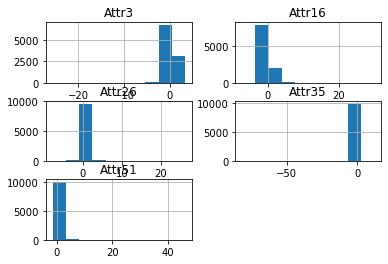

In [30]:
X = df.loc[:, ['Attr3', 'Attr16', 'Attr26', 'Attr35', 'Attr51']]#from Kbest
print(X)
Y=df.loc[:,["class"]]
print(Y)
X.hist()
X.boxplot()

In [31]:
Y.value_counts() #check imbalance


class
0        9797
1         203
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train, X_test, Y_train, Y_test)

         Attr3    Attr16    Attr26    Attr35    Attr51
5771  0.324915  0.196542  0.162825  0.918171  0.162150
7708 -1.568233 -0.680262 -0.638460 -0.578130 -0.240096
2115 -1.382264 -0.545148 -0.529359  0.023146  2.664054
8577 -0.654641 -0.683027 -0.676510 -1.498035 -0.011520
4663  0.081420 -0.352667 -0.360862 -0.211949  0.159165
...        ...       ...       ...       ...       ...
7662  0.719017 -0.383475 -0.392454 -0.150108  1.048162
5025 -0.649948 -0.447893 -0.437193 -0.727760 -0.128077
7183  0.775494 -0.370648 -0.358977  1.227407 -0.705996
8307  0.851691  1.872328  2.048520  2.403629 -0.997491
6124 -0.244314 -0.415384 -0.395407 -0.113657 -0.810697

[7000 rows x 5 columns]          Attr3    Attr16    Attr26    Attr35    Attr51
9308  0.975476  1.207515  1.052999  0.820578 -0.944670
4684 -0.784392 -0.536241 -0.518360 -0.181634  1.125962
2414  0.045477 -0.478377 -0.447735 -0.364658 -0.260783
1556 -0.089565 -0.385922 -0.351669 -0.055387  0.189705
2780 -0.141808  0.291298  0.363335 -0.42

In [34]:
from collections import Counter
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (E:\anaconda3\lib\site-packages\sklearn\base.py)

In [35]:
c = Counter(Y_train["class"])
oversam = SMOTE()

NameError: name 'SMOTE' is not defined

In [36]:
X_train, Y_train = oversam.fit_resample(X_train, Y_train)

NameError: name 'oversam' is not defined

In [37]:
Counter(Y_train["class"])

Counter({0: 6851, 1: 149})

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
from sklearn import linear_model

In [40]:
model = linear_model.LogisticRegression()

In [41]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy 0.9816666666666667


E:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import tree

In [ ]:
model=tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

In [ ]:
from sklearn import svm

In [ ]:
model=svm.SVC()

In [ ]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

In [ ]:
from sklearn import neural_network

In [ ]:
model = neural_network.MLPClassifier(solver="lbfgs", hidden_layer_sizes=(100,100), max_iter=500)

In [ ]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,Dropout

In [ ]:
model= Sequential()

In [ ]:
model.add(Dense(20,input_dim=10,activation="relu"))

In [ ]:
model.add(Dropout(0.1))

In [ ]:
model.add(Dense(40,activation="relu"))

In [ ]:
model.add(Dropout(0.1))

In [ ]:
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

In [ ]:
model.compile(loss = "binary_crossentropy",optimizer = "Adamax",metrics=["accuracy"])

In [ ]:
model.fit(X_train,Y_train,batch_size = 3, epochs=50)

In [ ]:
model.evaluate(X_test,Y_test)